### Importing libraries

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt

import skimage.data
import skimage.transform
import imageio

import tensorflow as tf

import random
import os

%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import SGD, Adam
from keras import backend as K
import keras




### Load Data

In [2]:
print(os.listdir("BTS"))

['Training', 'Testing']


In [3]:
print(os.listdir("BTS/Training"))
print(os.listdir("BTS/Testing"))

['00016', '00053', '00012', '00045', '00036', '00059', '00010', '00003', '00034', '00042', '00055', '00035', '00000', '00028', '00025', '00031', '00041', '00051', '00008', '00052', 'Readme.txt', '00060', '00013', '00030', '00007', '00009', '00026', '00006', '00039', '00019', '00037', '00002', '00038', '00023', '00027', '00015', '00040', '00057', '00022', '00043', '00048', '00047', '00029', '00046', '00058', '00020', '00001', '00044', '00011', '00017', '00004', '00049', '00054', '00056', '00032', '00050', '00018', '00005', '00021', '00061', '00033', '00014', '00024']
['00016', '00053', '00012', '00045', '00036', '00059', '00010', '00003', '00034', '00042', '00055', '00035', '00000', '00028', '00025', '00031', '00041', '00051', '00008', '00052', 'Readme.txt', '00060', '00013', '00030', '00007', '00009', '00026', '00006', '00039', '00019', '00037', '00002', '00038', '00023', '00027', '00015', '00040', '00057', '00022', '00043', '00048', '00047', '00029', '00046', '00058', '00020', '00001'

In [4]:
"""Loads a data set and returns two lists: 
    images: a list of Numpy arrays, each representing an image.
    labels: a list of numbers that represent the images labels.
    """

def load_data(data_dir):
    directories = [d for d in os.listdir(data_dir)
                   if os.path.isdir(os.path.join(data_dir, d))]# Get all subdirectories of data_dir. Each represents a label.
# Loop through the label directories and collect the data in two lists, labels and images.    
    labels = []
    images  =[]
    
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
        # For each label, load it's images and add them to the images list.
        
        for f in file_names:
            images.append(imageio.imread(f))
            #print(f)
            labels.append(int(d))
    return images, labels


In [5]:
ROOT_PATH = "BTS"

train_data_dir = os.path.join(ROOT_PATH, "Training")

#print(train_data_dir)
test_data_dir = os.path.join(ROOT_PATH, "Testing")
#print(os.listdir(train_data_dir))

images, labels = load_data(train_data_dir)

In [25]:
   batch_size = 16
valid_datagen = ImageDataGenerator(rescale=1. / 255)
validation_generator = valid_datagen.flow_from_directory(
        test_data_dir,
        target_size=(32, 32),
        batch_size=batch_size,
        #color_mode='grayscale',
        class_mode='categorical')


Found 2520 images belonging to 62 classes.


In [26]:

train_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = valid_datagen.flow_from_directory(
        train_data_dir,
        target_size=(32, 32),
        batch_size=batch_size,
        #color_mode='grayscale',
        class_mode='categorical')

Found 4575 images belonging to 62 classes.


### Here we're loading two lists:

images a list of images, each image is represted by a numpy array.

labels a list of labels. Integers with values between 0 and 61.

In [11]:
print("Unique Labels: {0}\nTotal Images: {1}".format(len(set(labels)), len(images)))

Unique Labels: 62
Total Images: 4575


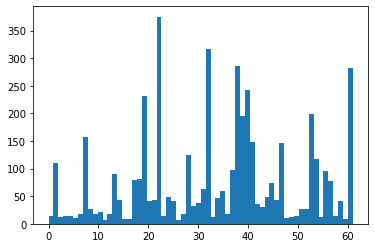

In [12]:
# Import the `pyplot` module
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

### visualising data

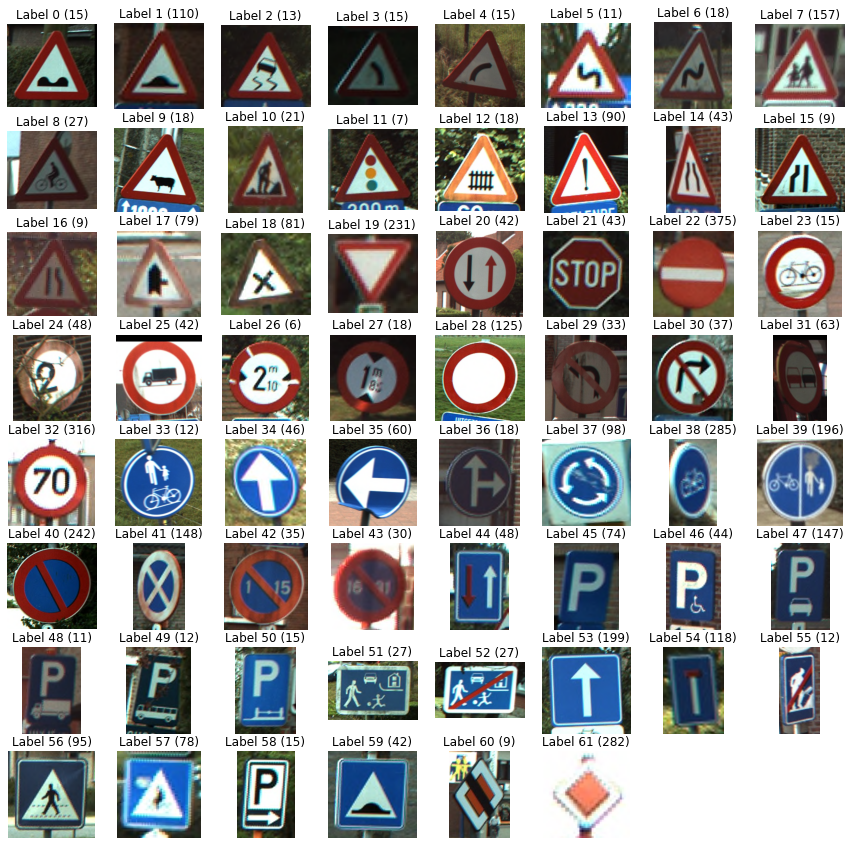

In [13]:
# display 1st image of each label

def first_image_label(images, labels):
    # Get unique labels
    unique_labels = set(labels)
    
    # Intialize the figure
    plt.figure(figsize= (15,15))
    
    # Set the counter
    i= 1
    
    # For unique labels
    for label in unique_labels:
        
        # picking the first image of label
        image = images[labels.index(label)]
        
        # making a grid of 8x8 -- 64 subplots
        plt.subplot(8, 8, i)
        
        plt.axis('off')
        
        ## Add a title to each subplot 
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        
        # Add 1 to the counter
        i += 1
     
        # And you plot this first image 
        plt.imshow(image)
    
    plt.show()
    
first_image_label(images, labels)
        
        


That looks great! The traffic signs occupy most of the area of each image, which is going to make our job easier: we don't have to look for the sign in the image. And we have a variety of angles and lighting conditions, which will help our model generalize.

However, although the images are square-ish, they're not all the same size. They have different aspect ratios. Our simple neural network takes a fixed-size input, so we have a bit of pre-processing to do. We'll get to that soon, but first let's pick a label and see more of it's images.

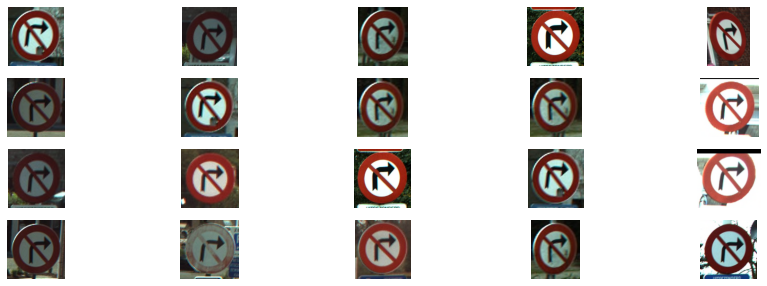

In [14]:
def display_label_images(images, label):
    """Display images of a specific label."""
    limit = 20  # show a max of 24 images
    
    plt.figure(figsize=(15, 5))
    i = 1

    start = labels.index(label)
    
    end = start + labels.count(label)
    
    for image in images[start:end][:limit]:
        plt.subplot(4, 5, i)  # 4 rows, 5 per row
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()

# checking for label - 30
display_label_images(images, 30)



In [ ]:
# checking other labels also

display_label_images(images, 26)

In [ ]:
display_label_images(images, 25)

In [ ]:
display_label_images(images, 32)

In [15]:
# checking size of images

for image in images[:10]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (74, 79, 3), min: 22, max: 211
shape: (133, 139, 3), min: 7, max: 255
shape: (57, 60, 3), min: 0, max: 246
shape: (96, 98, 3), min: 6, max: 255
shape: (115, 122, 3), min: 6, max: 255
shape: (52, 54, 3), min: 11, max: 238
shape: (91, 94, 3), min: 24, max: 230
shape: (118, 128, 3), min: 6, max: 255
shape: (153, 163, 3), min: 0, max: 255
shape: (153, 156, 3), min: 0, max: 255


Resize the images to 32 x 32

In [17]:
images32 = [skimage.transform.resize(image, (32, 32)) for image in images]

#display_label_images(images32,32)

In [18]:
#checking size of images

for image in images32[:10]:
    print("shape: {0}, min: {1}, max: {2}".format(image.shape, image.min(), image.max()))

shape: (32, 32, 3), min: 0.1242895986519609, max: 0.604752604166666
shape: (32, 32, 3), min: 0.054901960784313725, max: 0.7534553079044092
shape: (32, 32, 3), min: 0.03455499387254929, max: 0.9107575061274515
shape: (32, 32, 3), min: 0.08235294117647059, max: 0.899754901960785
shape: (32, 32, 3), min: 0.08394607843137243, max: 0.8978228400735293
shape: (32, 32, 3), min: 0.05188419117647036, max: 0.9157169117647059
shape: (32, 32, 3), min: 0.11764705882352941, max: 0.5787511488970587
shape: (32, 32, 3), min: 0.06562499999999996, max: 0.7592524509803912
shape: (32, 32, 3), min: 0.0, max: 0.872021484375
shape: (32, 32, 3), min: 0.07450980392156863, max: 0.996078431372549


The sizes are correct. But check the min and max values! They now range from 0 to 1.0, which is different from the 0-255 range we saw above. The resizing function did that transformation for us. Normalizing values to the range 0.0-1.0 is very common so we'll keep it. But remember to multiply by 255 if you later want to convert the images back to the normal 0-255 range.

In [19]:
# convert images and label to array type

labels_a = np.array(labels)
images_a = np.array(images32)

print("labels: ", labels_a.shape, "\nimages: ", images_a.shape)

labels:  (4575,) 
images:  (4575, 32, 32, 3)


In [20]:
def cnn_model_1():
    if K.image_data_format() == 'channels_first':
        input_shape = (3, 32 , 32)
    else:
        input_shape = (32, 32 , 3)

    model = Sequential()
    model.add(Conv2D(2, kernel_size=(5, 5),
                     strides=(2, 2),
                     padding='same',
                     input_shape=input_shape))
    model.add(Activation('relu'))

    model.add(Flatten())
    model.add(Dense(200))
    model.add(Activation('relu'))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [31]:
def cnn_model_lenet():
    if K.image_data_format() == 'channels_first':
        input_shape = (3, 32, 32)
    else:
        input_shape = (32, 32, 3)

    model = Sequential()

    # Convolutional Layer 1
    model.add(Conv2D(6, kernel_size=(5, 5), input_shape=input_shape, use_bias=True,
                     padding="same"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))

    # Dropout Layer 1
    model.add(Dropout(rate=0.12))

    # Convolutional Layer 2
    model.add(Conv2D(16, kernel_size=(5, 5), use_bias=True,
                     padding="same"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))

    # Convolutional Layer 3
    model.add(Conv2D(35, kernel_size=(5, 5), use_bias=True,
                     padding="same"))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="same"))

    # Flatten convolutional result so we can feed data to fully connected layers
    model.add(Flatten())

    # Fully connected 1
    model.add(Dense(120, use_bias=True))
    model.add(Activation('relu'))

    # Dropout Layer 2
    model.add(Dropout(rate=0.5))

    # Fully connected 1
    model.add(Dense(84, use_bias=True))
    model.add(Activation('relu'))

    model.add(Dense(num_classes, use_bias=True))
    model.add(Activation('softmax'))

    model.compile(optimizer=Adam(lr=0.001),
                  loss="categorical_crossentropy",
                  metrics=['accuracy'])

    return model

In [28]:
def plot_loss_accuracy(_model_hist, _epochs, _name):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, _epochs), _model_hist.history["loss"], label="train_loss")
    plt.plot(np.arange(0, _epochs), _model_hist.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, _epochs), _model_hist.history["Accuracy"], label="train_Accuracy")
    plt.plot(np.arange(0, _epochs), _model_hist.history["val_Accuracy"], label="val_Accuracy")
    plt.title("Training Loss and Accuracy Belgian Traffic Sign Dataset\n Model: " + _name)
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.savefig("./figures/" + _name + ".png")

    return None

In [32]:
def plot_loss_accuracy(_model_hist, _epochs, _name):
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, _epochs), _model_hist.history["loss"], label="train_loss")
    plt.plot(np.arange(0, _epochs), _model_hist.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, _epochs), _model_hist.history["acc"], label="train_acc")
    plt.plot(np.arange(0, _epochs), _model_hist.history["val_acc"], label="val_acc")
    plt.title("Training Loss and Accuracy Belgian Traffic Sign Dataset\n Model: " + _name)
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    plt.savefig("./figures/" + _name + ".png")

    return None


In [34]:
def train_test_evaluate(_model, _train_generator, _val_generator, _nb_train_samples, _nb_val_samples,
                        _batch_size, _epochs, _model_name):

    _hist = _model.fit_generator(_train_generator,
                                 steps_per_epoch=_nb_train_samples // _batch_size,
                                 epochs=_epochs,
                                 validation_data=_val_generator,
                                 validation_steps=_nb_val_samples // _batch_size)

    _score = _model.evaluate_generator(_val_generator, _nb_val_samples)
    print("Score for model: Test loss: ", _score[0])
    print("Score for model: Test accuracy: ", _score[1])

    _model.summary()
    plot_loss_accuracy(_hist, _epochs, _model_name)
    _model.save("./models/" + _model_name + ".h5")

    return _model, _hist, _score

####################################################################################
###################################  CNN1  #########################################
####################################################################################
Epoch 1/10
285/285 [==============================] - 3s 11ms/step - loss: 1.8704 - accuracy: 0.5835 - val_loss: 1.0162 - val_accuracy: 0.7377
Epoch 2/10
285/285 [==============================] - 3s 11ms/step - loss: 0.5892 - accuracy: 0.8568 - val_loss: 0.6123 - val_accuracy: 0.8280
Epoch 3/10
285/285 [==============================] - 3s 10ms/step - loss: 0.2970 - accuracy: 0.9248 - val_loss: 0.4398 - val_accuracy: 0.8758
Epoch 4/10
285/285 [==============================] - 3s 10ms/step - loss: 0.1700 - accuracy: 0.9577 - val_loss: 0.3725 - val_accuracy: 0.8993
Epoch 5/10
285/285 [==============================] - 3s 10ms/step - loss: 0.1021 - accuracy: 0.9792 - val_loss: 0.3709 - val_accuracy: 0.9080
Epoch 6/10
285/285 [==========

KeyError: 'acc'

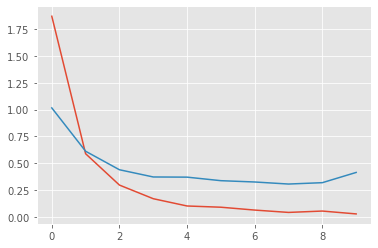

In [35]:
if __name__ == '__main__':
    nb_train_samples = 4575
    nb_validation_samples = 2520
    epochs = 10
 
    num_classes = 62
    
    train_gen, val_gen = train_generator, validation_generator

    print("####################################################################################")
    print("###################################  CNN1  #########################################")
    print("####################################################################################")
    model_cnn_1 = cnn_model_1()
    m1_model, m1_hist, m1_score = train_test_evaluate(model_cnn_1, train_gen, val_gen, nb_train_samples,
                                                      nb_validation_samples, batch_size, epochs, "CNN1")

In [ ]:
https://github.com/Allegra42/ki-keras-belgian-traffic-sign/blob/master/Keras.py